In [ ]:
import numpy as np  
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Dataset/Data_Visualization_Assignment_4/local_mortality.csv')

In [ ]:
df_India = df[df.country_name == 'India']

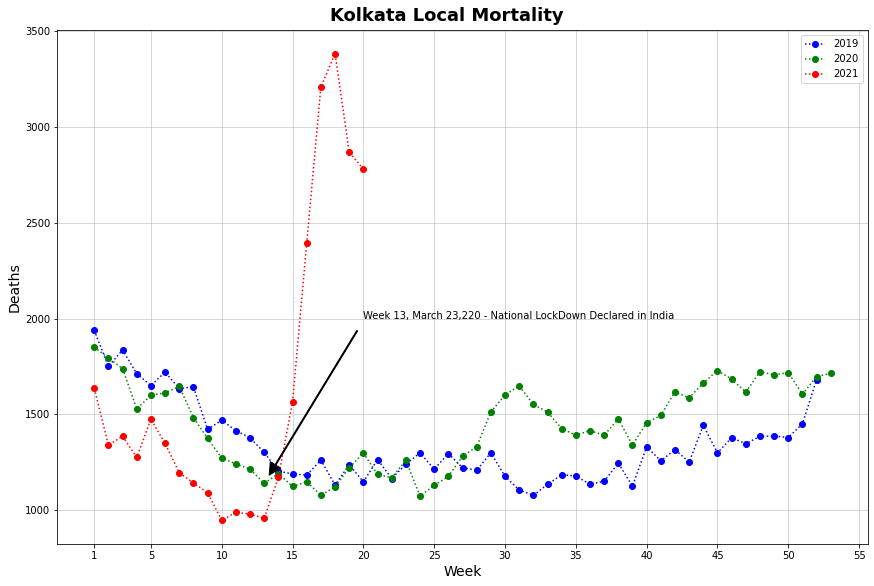

In [ ]:
df_kolkata = df_India[df_India.local_unit_name == 'Kolkata City']

fig, ax = plt.subplots(figsize=(12, 8))

fig.suptitle("Kolkata Local Mortality", fontsize=18, fontweight='bold')

color = {
    2019: 'blue',
    2020: 'green',
    2021: 'red'
}

for i in range(2019, 2022):
  plt.plot(
      df_kolkata[df_kolkata.year == i]['time'],
      df_kolkata[df_kolkata.year == i]['deaths'], 
      ':o',
      label=i,
      color=color[i]
  )

plt.xticks(
    ticks = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55],
    labels = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55]
) 

ax.annotate(
    'Week 13, March 23,220 - National LockDown Declared in India', 
    xy=(13, 1140), 
    xytext=(20, 2000),
    arrowprops=dict(
        facecolor='black', 
        shrink=0.05,
        width=1
        )
)

plt.grid(which='both',axis='both', linewidth=0.5)
fig.tight_layout()
fig.subplots_adjust(top=0.94)
plt.xlabel("Week", size=14)
plt.ylabel("Deaths", size=14)
plt.legend()
plt.show()

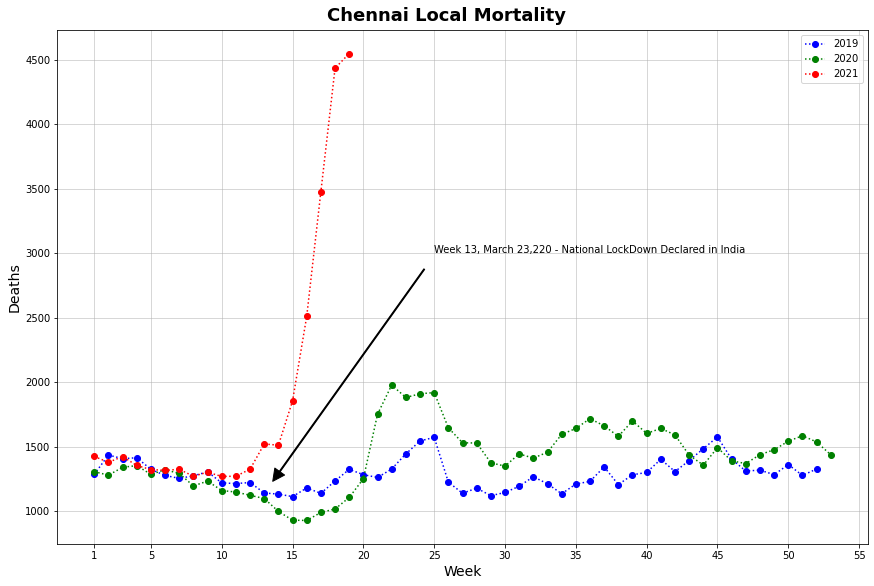

In [ ]:
Chennai = df_India[df_India.local_unit_name == 'Chennai City']

fig, ax = plt.subplots(figsize=(12, 8))

fig.suptitle("Chennai Local Mortality", fontsize=18, fontweight='bold')

color = {
    2019: 'blue',
    2020: 'green',
    2021: 'red'
}

for i in range(2019, 2022):
  plt.plot(
      Chennai[Chennai.year == i]['time'],
      Chennai[Chennai.year == i]['deaths'], 
      ':o',
      label=i,
      color=color[i]
  )

plt.xticks(
    ticks = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55],
    labels = [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55]
) 
plt.grid(which='both',axis='both', linewidth=0.5)
fig.tight_layout()
fig.subplots_adjust(top=0.94)
plt.xlabel("Week", size=14)
plt.ylabel("Deaths", size=14)
ax.annotate(
    'Week 13, March 23,220 - National LockDown Declared in India', 
    xy=(13, 1140), 
    xytext=(25, 3000),
    arrowprops=dict(
        facecolor='black', 
        shrink=0.05,
        width=1
        )
)
plt.legend()
plt.show()

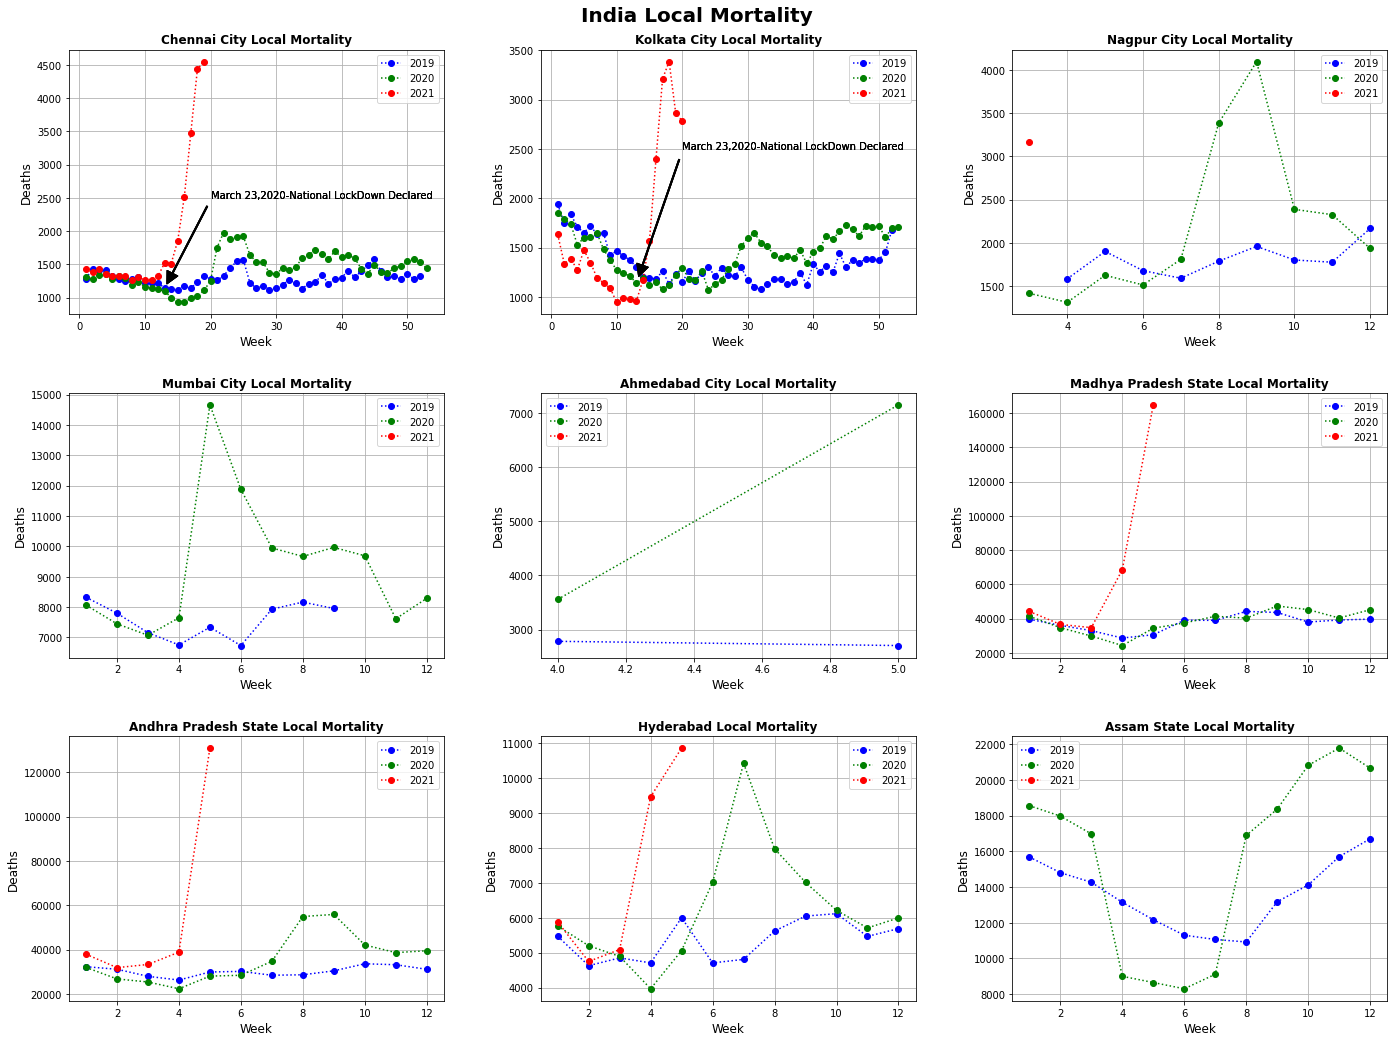

In [ ]:
cities = list(df_India.local_unit_name.unique())

fig, ax = plt.subplots(3, 3, figsize=(20,15))
fig.suptitle("India Local Mortality", fontsize=20, fontweight='bold')
color = {
    2019: 'blue',
    2020: 'green',
    2021: 'red'
}

for i,axi in enumerate(ax.flat):
  temp = df_India[df_India.local_unit_name == cities[i]]

  for j in range(2019, 2022):
    data = temp[temp.year == j]
    axi.plot(
        data['time'],
        data['deaths'], 
        ':o',
        label=j,
        color=color[j]
    )

    axi.set_xlabel("Week", fontdict={'fontsize': 12,})
    axi.set_ylabel("Deaths", fontdict={'fontsize': 12,})
    axi.grid(b=True, which='major',axis='both')
    axi.legend()
    axi.set_title(cities[i] + ' Local Mortality', fontdict={'fontsize': 12, 'fontweight' : 'bold',})

    if i < 2: 
      axi.annotate(
          'March 23,2020-National LockDown Declared', 
          xy=(13, 1140), 
          xytext=(20, 2500),
          arrowprops=dict(
              facecolor='black', 
              shrink=0.05,
              width=1
              )
      )

fig.tight_layout(pad=3.0)
fig.subplots_adjust(top=0.94)



---

In [ ]:
excess_deaths = pd.read_csv('/content/drive/MyDrive/Dataset/Data_Visualization_Assignment_4/chennai-registered-deaths-excess-mortality_data_excess-deaths.csv')
excess_deaths['Date'] = pd.to_datetime(excess_deaths['Date'])
excess_deaths.head()

,Date,Historical Avg (2015-2019),Cumulative COVID Deaths,Daily COVID Deaths,14 Day Avg COVID Deaths,Registered Deaths,14 Day Avg Registered Deaths,Excess Deaths
0,2021-04-30,159.657143,4741,43,27.142857,230,279.642857,119.985714
1,2021-04-29,159.257143,4698,40,24.857143,280,280.428571,121.171429
2,2021-04-28,159.771429,4658,32,22.642857,286,274.642857,114.871429
3,2021-04-27,158.771429,4626,27,20.857143,318,270.214286,111.442857
4,2021-04-26,158.014286,4599,35,19.285714,343,262.714286,104.700000


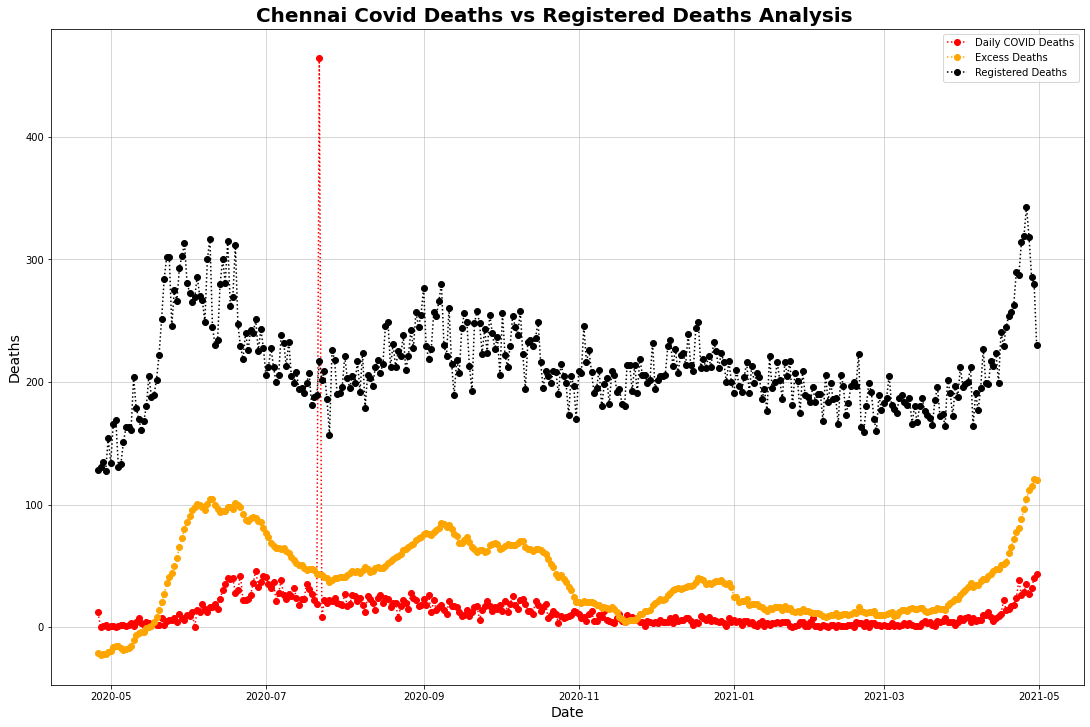

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))

fig.suptitle("Chennai Covid Deaths vs Registered Deaths Analysis", fontsize=20, fontweight='bold')

color = {
    2019: 'blue',
    2020: 'green',
    2021: 'red'
}

plt.plot(
    excess_deaths['Date'],
    excess_deaths['Daily COVID Deaths'],
    ':o',
    label='Daily COVID Deaths',
    color='red'
)

plt.plot(
    excess_deaths['Date'],
    excess_deaths['Excess Deaths'],
    ':o',
    label='Excess Deaths',
    color='orange'
)

plt.plot(
    excess_deaths['Date'],
    excess_deaths['Registered Deaths'],
    ':o',
    label='Registered Deaths',
    color='black'
)

plt.grid(which='both',axis='both', linewidth=0.5)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.xlabel("Date", size=14)
plt.ylabel("Deaths", size=14)

plt.legend()
plt.show()

In [ ]:
excess_deaths['year'] = pd.DatetimeIndex(excess_deaths['Date']).year
excess_deaths['month'] = pd.DatetimeIndex(excess_deaths['Date']).month
excess_deaths['month_year'] = pd.to_datetime(excess_deaths['Date']).dt.to_period('M')
excess_deaths.head()

,Date,Historical Avg (2015-2019),Cumulative COVID Deaths,Daily COVID Deaths,14 Day Avg COVID Deaths,Registered Deaths,14 Day Avg Registered Deaths,Excess Deaths,year,month,month_year
0,2021-04-30,159.657143,4741,43,27.142857,230,279.642857,119.985714,2021,4,2021-04
1,2021-04-29,159.257143,4698,40,24.857143,280,280.428571,121.171429,2021,4,2021-04
2,2021-04-28,159.771429,4658,32,22.642857,286,274.642857,114.871429,2021,4,2021-04
3,2021-04-27,158.771429,4626,27,20.857143,318,270.214286,111.442857,2021,4,2021-04
4,2021-04-26,158.014286,4599,35,19.285714,343,262.714286,104.700000,2021,4,2021-04


In [ ]:
Historical_Avg_agg = excess_deaths.groupby('month_year')['Historical Avg (2015-2019)'].agg(['mean', 'sum', 'max', 'min'])
Cumulative_COVID_Deaths_agg = excess_deaths.groupby('month_year')['Cumulative COVID Deaths'].agg(['mean', 'sum', 'max', 'min'])
Daily_COVID_Deaths_agg = excess_deaths.groupby('month_year')['Daily COVID Deaths'].agg(['mean', 'sum', 'max', 'min'])
Fourteen_Day_Avg_COVID_Deaths_agg = excess_deaths.groupby('month_year')['14 Day Avg COVID Deaths'].agg(['mean', 'sum', 'max', 'min'])
Registered_Deaths_agg = excess_deaths.groupby('month_year')['Registered Deaths'].agg(['mean', 'sum', 'max', 'min'])
Fourteen_Day_Avg_Registered_Deaths_agg = excess_deaths.groupby('month_year')['14 Day Avg Registered Deaths'].agg(['mean', 'sum', 'max', 'min'])
Excess_Deaths_agg = excess_deaths.groupby('month_year')['Excess Deaths'].agg(['mean', 'sum', 'max', 'min'])

In [ ]:
Historical_Avg_agg.reset_index(inplace=True)
Excess_Deaths_agg.reset_index(inplace=True)
Fourteen_Day_Avg_Registered_Deaths_agg.reset_index(inplace=True)

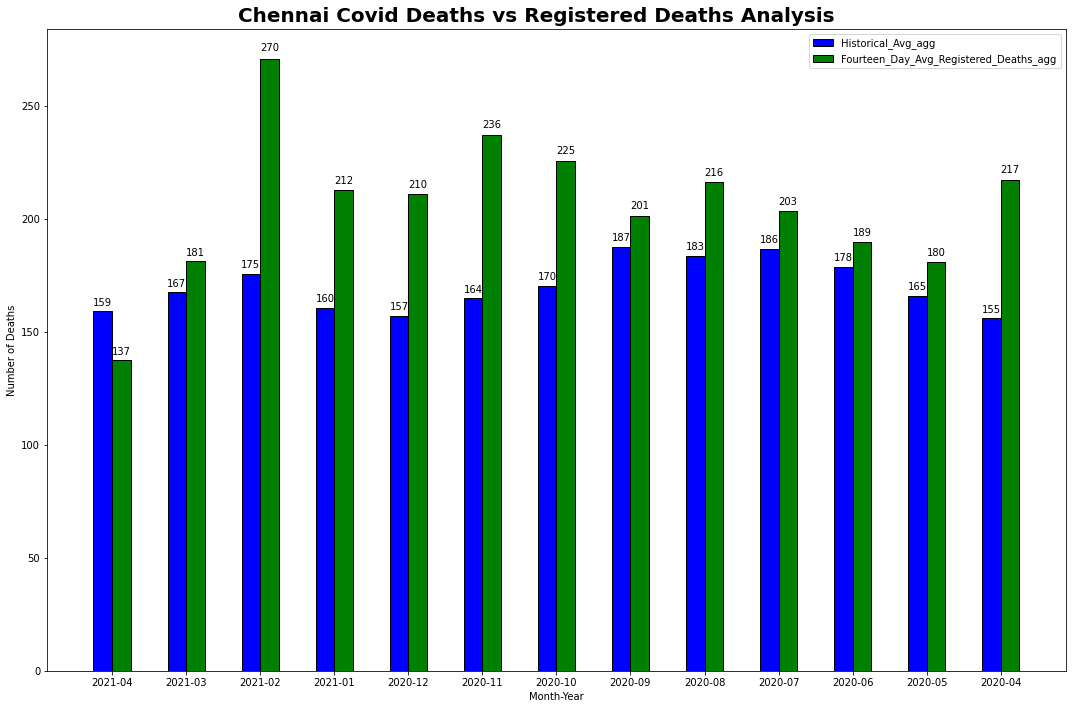

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))

fig.suptitle("Chennai Covid Deaths vs Registered Deaths Analysis", fontsize=20, fontweight='bold')

groups = list(excess_deaths['month_year'].unique())
n = len(groups)
r = np.arange(n)
width = 0.25
  
rects1 = plt.bar(
    r, 
    Historical_Avg_agg['mean'],
    color = 'b',
    width = width, 
    edgecolor = 'black',
    label='Historical_Avg_agg'
)
rects2 = plt.bar(
    r + width, 
    Fourteen_Day_Avg_Registered_Deaths_agg['mean'],
    color = 'g',
    width = width, 
    edgecolor = 'black',
    label='Fourteen_Day_Avg_Registered_Deaths_agg'
)

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width()/2., 
            1.01*height,
            '%d' % int(height),
            horizontalalignment='center', 
            verticalalignment='bottom',)

autolabel(rects1)
autolabel(rects2)

plt.xlabel("Month-Year")
plt.ylabel("Number of Deaths")

plt.xticks(r + width/2, groups)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.legend()
  
plt.show()

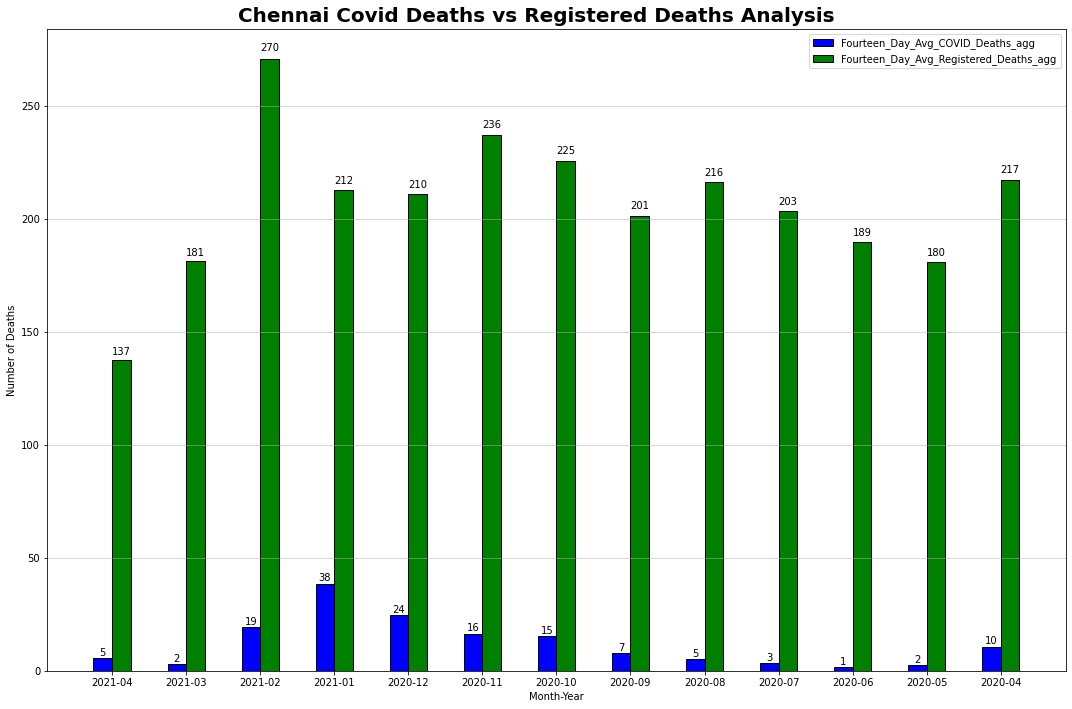

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))

fig.suptitle("Chennai Covid Deaths vs Registered Deaths Analysis", fontsize=20, fontweight='bold')

groups = list(excess_deaths['month_year'].unique())
n = len(groups)
r = np.arange(n)
width = 0.25
  
rects1 = plt.bar(
    r, 
    Fourteen_Day_Avg_COVID_Deaths_agg['mean'],
    color = 'b',
    width = width, 
    edgecolor = 'black',
    label='Fourteen_Day_Avg_COVID_Deaths_agg'
)


rects2 = plt.bar(
    r + width, 
    Fourteen_Day_Avg_Registered_Deaths_agg['mean'],
    color = 'g',
    width = width, 
    edgecolor = 'black',
    label='Fourteen_Day_Avg_Registered_Deaths_agg'
)

plt.grid(which='both',axis='y', linewidth=0.5)

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(
            rect.get_x() + rect.get_width()/2., 
            1.01*height,
            '%d' % int(height),
            horizontalalignment='center', 
            verticalalignment='bottom',)

autolabel(rects1)
autolabel(rects2)

plt.xlabel("Month-Year")
plt.ylabel("Number of Deaths")

plt.xticks(r + width/2, groups)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.legend()
  
plt.show()

---

In [ ]:
TN = pd.read_excel(
    '/content/drive/MyDrive/Dataset/Data_Visualization_Assignment_4/CRS data for Tamil Nadu.xlsx',
    sheet_name=1,
    header=[1,2]
    )
# TN.head()

In [ ]:
death_by_disease = pd.DataFrame()
death_by_disease['Disease'] = TN['Cause of Deaths']['Unnamed: 0_level_1']
death_by_disease['2018_Death_Count'] = TN[2018]['No. of Deaths']
death_by_disease['2018_Death_Percent'] = TN[2018]['%']
death_by_disease['2019_Death_Count'] = TN[2019]['No. of Deaths']
death_by_disease['2019_Death_Percent'] = TN[2019]['%']
death_by_disease['2020_Death_Count'] = TN[2020]['No. of Deaths']
death_by_disease['2020_Death_Percent'] = TN[2020]['%']
death_by_disease['2021_Death_Count'] = TN[2021]['No. of Deaths']
death_by_disease['2021_Death_Percent'] = TN[2021]['%']
death_by_disease.fillna(0)
death_by_disease.drop(32, axis=0, inplace=True)
print(1)

1


In [ ]:
fn = lambda x: ' '.join(x.split(' ')[:4])
death_by_disease['Disease_striped'] = death_by_disease['Disease'].apply(fn)
# death_by_disease.head()

In [ ]:
death_by_disease['change_21_19'] = death_by_disease['2021_Death_Percent']  - death_by_disease['2019_Death_Percent'] 
death_by_disease['change_20_19'] = death_by_disease['2020_Death_Percent']  - death_by_disease['2019_Death_Percent'] 
# death_by_disease

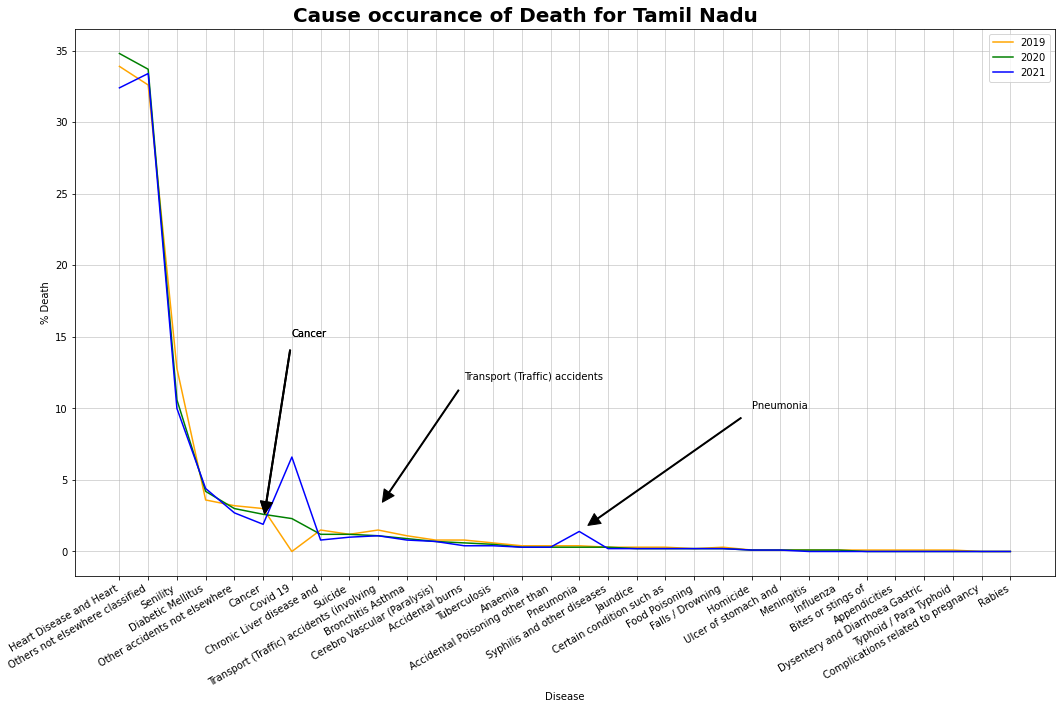

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))

fig.suptitle("Cause occurance of Death for Tamil Nadu", fontsize=20, fontweight='bold')

groups = list([2018, 2019, 2020,2021])
n = len(groups)
r = np.arange(n)
width = 0.25
  
plt.plot(
    death_by_disease['Disease_striped'], 
    death_by_disease['2019_Death_Percent'],
    color = 'orange',
    label='2019'
)

plt.plot(
    death_by_disease['Disease_striped'], 
    death_by_disease['2020_Death_Percent'],
    color = 'green',
    label='2020'
)

plt.plot(
    death_by_disease['Disease_striped'], 
    death_by_disease['2021_Death_Percent'],
    color = 'blue',
    label='2021'
)

ax.annotate(
    'Pneumonia', 
    xy=('Pneumonia', 1.4), 
    xytext=('Homicide', 10),
    arrowprops=dict(
        facecolor='black', 
        shrink=0.05,
        width=1
        )
)

ax.annotate(
    'Cancer', 
    xy=('Cancer', 2), 
    xytext=('Covid 19', 15),
    arrowprops=dict(
        facecolor='black', 
        shrink=0.05,
        width=1
        )
)

ax.annotate(
    'Cancer', 
    xy=('Cancer', 2), 
    xytext=('Covid 19', 15),
    arrowprops=dict(
        facecolor='black', 
        shrink=0.05,
        width=1
        )
)

ax.annotate(
    'Transport (Traffic) accidents', 
    xy=('Transport (Traffic) accidents (involving', 3), 
    xytext=('Accidental burns', 12),
    arrowprops=dict(
        facecolor='black', 
        shrink=0.05,
        width=1
        )
)

plt.xlabel("Disease")
plt.ylabel("% Death")

plt.grid(which='both',axis='both', linewidth=0.5)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
fig.tight_layout()
fig.subplots_adjust(top=0.95)

plt.legend()
  
plt.show()

In [ ]:
x = death_by_disease.copy()
x = x[np.abs(x['change_21_19']) > 0.2] 
x = x.reindex(x['change_21_19'].abs().sort_values(ascending=False).index)
x.head()

,Disease,2018_Death_Count,2018_Death_Percent,2019_Death_Count,2019_Death_Percent,2020_Death_Count,2020_Death_Percent,2021_Death_Count,2021_Death_Percent,Disease_striped,change_21_19,change_20_19
6,Covid 19,0,0.0,NaN,0.0,14652,2.3,21155,6.6,Covid 19,6.6,2.3
2,Senility,71541,13.3,75042.0,12.8,68448,10.6,31965,10.0,Senility,-2.8,-2.2
0,Heart Disease and Heart Attacks,182398,34.0,199329.0,33.9,224304,34.8,103141,32.4,Heart Disease and Heart,-1.5,0.9
5,Cancer,16867,3.1,17456.0,3.0,16487,2.6,6098,1.9,Cancer,-1.1,-0.4
16,Pneumonia,3447,0.6,2364.0,0.4,2044,0.3,4392,1.4,Pneumonia,1.0,-0.1


In [ ]:
x['Disease_striped'].unique()

array(['Covid 19', 'Senility', 'Heart Disease and Heart', 'Cancer',
       'Pneumonia', 'Diabetic Mellitus',
       'Others not elsewhere classified', 'Chronic Liver disease and',
       'Other accidents not elsewhere', 'Accidental burns',
       'Transport (Traffic) accidents (involving', 'Bronchitis Asthma'],
      dtype=object)

In [ ]:
x['Disease_striped'] = ['Covid 19', 'Senility', 'Heart Disease', 'Cancer',
       'Pneumonia', 'Diabetic Mellitus',
       'Others not elsewhere classified', 'Chronic Liver disease',
       'Other accidents not elsewhere', 'Accidental burns',
       'Transport accidents', 'Bronchitis Asthma']

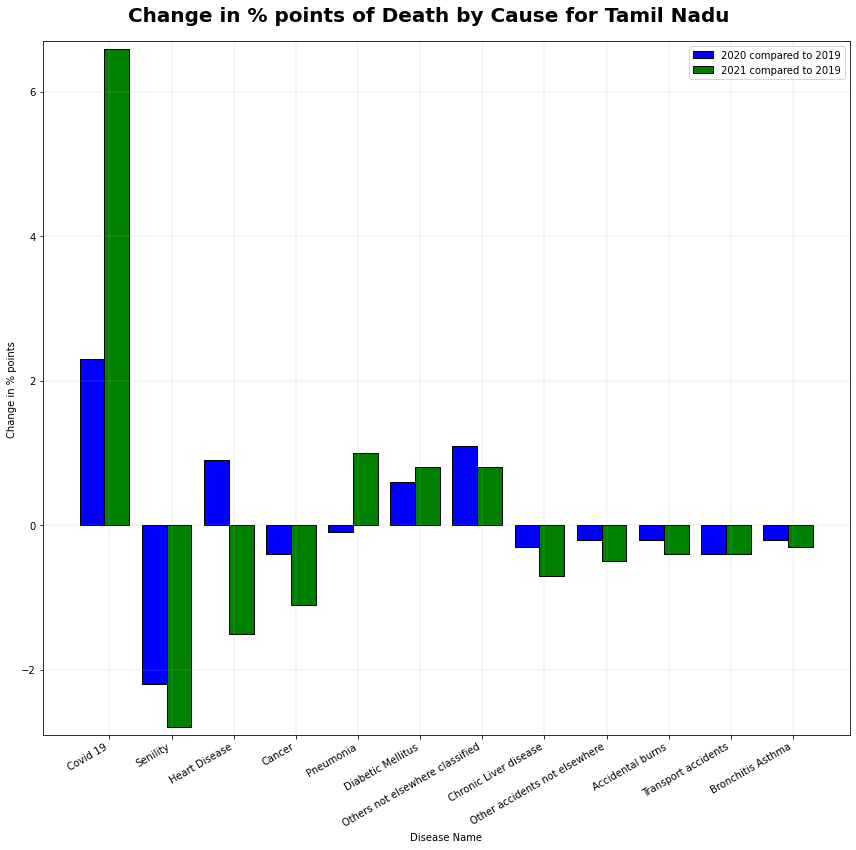

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))

fig.suptitle("Change in % points of Death by Cause for Tamil Nadu", fontsize=20, fontweight='bold')

groups = list(x['Disease_striped'].unique())
n = len(groups)
r = np.arange(n)
width = 0.4
  
rects1 = plt.bar(
    r, 
    x['change_20_19'],
    color = 'b',
    width = width, 
    edgecolor = 'black',
    label='2020 compared to 2019',
    # align='edge'
)

rects2 = plt.bar(
    r + width, 
    x['change_21_19'],
    color = 'g',
    width = width, 
    edgecolor = 'black',
    label='2021 compared to 2019'
)

plt.grid(which='both',axis='both', linewidth=0.2)

plt.xlabel("Disease Name")
plt.ylabel("Change in % points ")

plt.ylim(-2.9,6.7)
plt.xticks(r + 0.7*width, groups)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

fig.tight_layout()
fig.subplots_adjust(top=0.94)
plt.legend()
  
plt.show()

---

In [ ]:
mp = pd.read_excel(
    '/content/drive/MyDrive/Dataset/Data_Visualization_Assignment_4/Data Viz_Assignment 4_Datasets/MP districts deaths data.xlsx',
    sheet_name=0)
mp.drop(0, axis=0, inplace=True)
# mp.head()

In [ ]:
mp.columns = [ 'District',
      'May-21', 'May-20', 'May-19', 'May-18', 'April-21', 'April-20', 'April-19', 'April-18', 'type' ]
# mp.head()

In [ ]:
db_city_size = pd.DataFrame()
death_by_city_size = mp.groupby('type').agg({'mean'})
db_city_size['type'] = death_by_city_size.index
db_city_size['May-21'] = np.array(death_by_city_size['May-21']['mean'])
db_city_size['May-20'] = np.array(death_by_city_size['May-20']['mean'])
db_city_size['May-19'] = np.array(death_by_city_size['May-19']['mean'])
db_city_size['May-18'] = np.array(death_by_city_size['May-18']['mean'])
db_city_size['April-21'] = np.array(death_by_city_size['April-21']['mean'])
db_city_size['April-20'] = np.array(death_by_city_size['April-20']['mean'])
db_city_size['April-19'] = np.array(death_by_city_size['April-19']['mean'])
db_city_size['April-18'] = np.array(death_by_city_size['April-18']['mean'])
db_city_size.set_index('type', inplace=True)
db_city_size = db_city_size.T
db_city_size.reset_index(inplace=True)
db_city_size.head()

type,index,Big City,City,Others,V Big City
0,May-21,5548.5,3357.08,2264.636364,9994.0
1,May-20,1282.0,707.40,487.545455,1657.0
2,May-19,1400.0,629.68,430.863636,1240.0
3,May-18,1375.0,683.48,457.500000,1272.5
4,April-21,2284.0,1292.16,1001.272727,4816.0


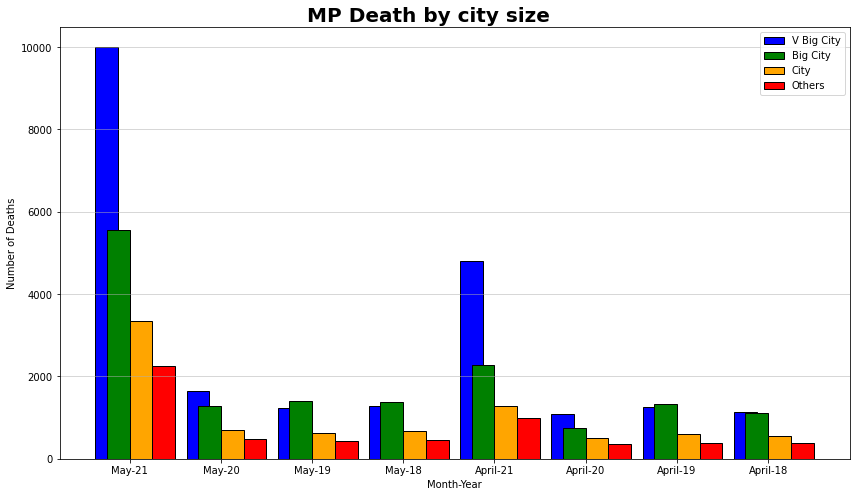

In [ ]:
fig, ax = plt.subplots(figsize=(12, 7))

fig.suptitle("MP Death by city size", fontsize=20, fontweight='bold')

groups = list(db_city_size['index'].unique())
n = len(groups)
r = np.arange(n)
width = 0.25
  
rects1 = plt.bar(
    r, 
    db_city_size['V Big City'],
    color = 'b',
    width = width, 
    edgecolor = 'black',
    label='V Big City',
    align='edge'
)

rects2 = plt.bar(
    r + width, 
    db_city_size['Big City'],
    color = 'g',
    width = width, 
    edgecolor = 'black',
    label='Big City'
)

rects3 = plt.bar(
    r + 2*width, 
    db_city_size['City'],
    color = 'orange',
    width = width, 
    edgecolor = 'black',
    label='City'
)

rects4 = plt.bar(
    r + 3*width, 
    db_city_size['Others'],
    color = 'red',
    width = width, 
    edgecolor = 'black',
    label='Others'
)

plt.grid(which='both',axis='y', linewidth=0.5)

plt.xlabel("Month-Year")
plt.ylabel("Number of Deaths")

plt.xticks(r + 1.5*width, groups)

fig.tight_layout()
fig.subplots_adjust(top=0.94)
plt.legend()
  
plt.show()

---

In [ ]:
mp_deaths = pd.read_excel(
    '/content/drive/MyDrive/Dataset/Data_Visualization_Assignment_4/Data Viz_Assignment 4_Datasets/MP deaths.xlsx',
    sheet_name=0)
mp_deaths.drop(
    ['Unnamed: 6',], 
    axis=1, 
    inplace=True
)
mp_deaths.drop([12, 13, 14, 15], axis=0, inplace=True)
mp_deaths.fillna(0, inplace=True)
# mp_deaths.head()

In [ ]:
mp_deaths['% Increment 21'] = np.round(((mp_deaths[2021] - mp_deaths['2018-19 average']) / mp_deaths['2018-19 average']) * 100)
mp_deaths['% Increment 20'] = np.round(((mp_deaths[2020] - mp_deaths['2018-19 average']) / mp_deaths['2018-19 average']) * 100)
# mp_deaths.head()

In [ ]:
mp_deaths['Month_Year_20'] = mp_deaths['Total registered deaths in:'].replace({
    'Jan': 'Jan 20', 
    'Feb': 'Feb 20',
    'March': 'Mar 20',
    'April': 'Apr 20',
    'May': 'May 20',
    'June': 'June 20',
    'July': 'July 20',
    'August': 'Aug 20',
    'September': 'Sept 20',
    'October': 'Oct 20',
    'November': 'Nov 20',
    'December': 'Dec 20',
})
mp_deaths['Month_Year_21'] = mp_deaths['Total registered deaths in:'].replace({
    'Jan': 'Jan 21', 
    'Feb': 'Feb 21',
    'March': 'Mar 21',
    'April': 'Apr 21',
    'May': 'May 21',
    'June': 'June 21',
    'July': 'July 21',
    'August': 'Aug 21',
    'September': 'Sept 21',
    'October': 'Oct 21',
    'November': 'Nov 21',
    'December': 'Dec 21',
})
mp_deaths

,Total registered deaths in:,2018,2019,2018-19 average,2020,2021,Excess deaths (2021 minus 2018-19 average),Officially reported covid deaths in 2021,% Increment 21,% Increment 20,Month_Year_20,Month_Year_21
0,Jan,34451.0,39528.0,36989.5,41281.0,44133.0,7143.5,204.0,19.0,12.0,Jan 20,Jan 21
1,Feb,29986.0,36005.0,32995.5,34645.0,36535.0,3539.5,54.0,11.0,5.0,Feb 20,Feb 21
2,March,28504.0,32911.0,30707.5,29747.0,34667.0,3959.5,122.0,13.0,-3.0,Mar 20,Mar 21
3,April,26949.0,28599.0,27774.0,24198.0,68535.0,40761.0,1630.0,147.0,-13.0,Apr 20,Apr 21
4,May,32456.0,30506.0,31481.0,34320.0,164838.0,133357.0,2451.0,424.0,9.0,May 20,May 21
5,June,33818.0,38978.0,36398.0,37399.0,0.0,0.0,0.0,-100.0,3.0,June 20,June 21
6,July,36523.0,38922.0,37722.5,41303.0,0.0,0.0,0.0,-100.0,9.0,July 20,July 21
7,August,38230.0,44151.0,41190.5,40213.0,0.0,0.0,0.0,-100.0,-2.0,Aug 20,Aug 21
8,September,40180.0,43517.0,41848.5,47315.0,0.0,0.0,0.0,-100.0,13.0,Sept 20,Sept 21
9,October,37766.0,37953.0,37859.5,45208.0,0.0,0.0,0.0,-100.0,19.0,Oct 20,Oct 21


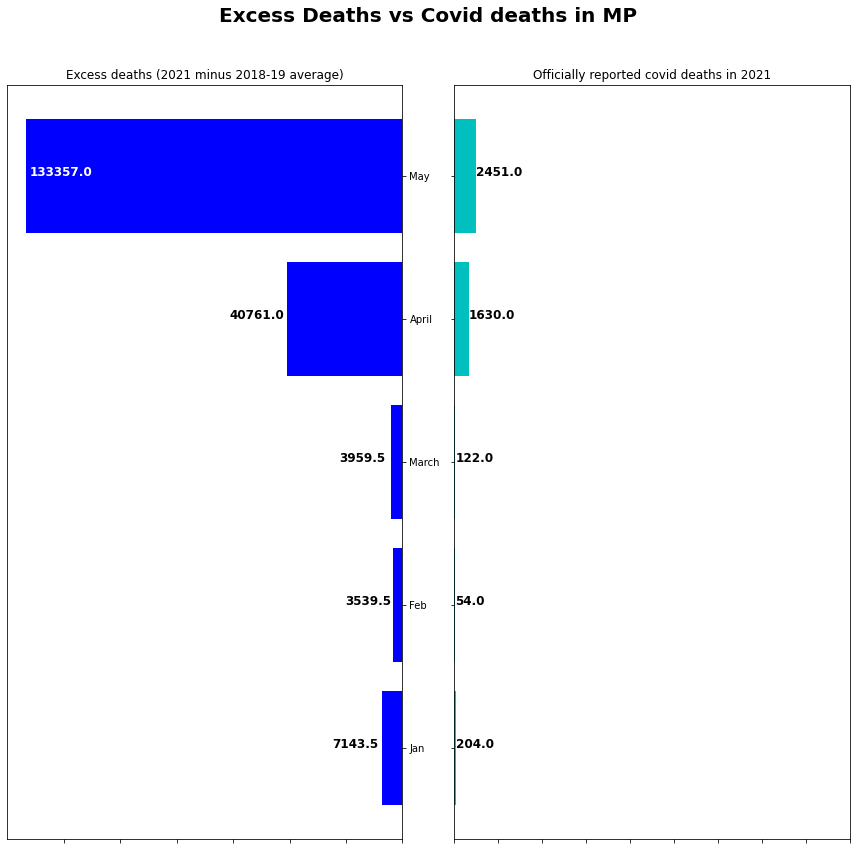

In [ ]:
x = mp_deaths[mp_deaths['Excess deaths (2021 minus 2018-19 average)'] > 0]['Excess deaths (2021 minus 2018-19 average)']
y = mp_deaths[mp_deaths['Officially reported covid deaths in 2021'] > 0]['Officially reported covid deaths in 2021']

z = np.round(x/y) 

l = y.shape[0]
r = np.arange(l)
groups = list(mp_deaths['Total registered deaths in:'].unique())[:l]

x_range_1 = list(range(0, 140000, 20000))
x_range_2 = list(range(0, 50000, 5000))

fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(12, 12))
fig.suptitle("Excess Deaths vs Covid deaths in MP", fontsize=20, fontweight='bold')

p1 = axes[0].barh(
    r, 
    x,
    align='center', 
    color='b',
    label='Excess deaths (2021 minus 2018-19 average)'
)

p2 = axes[1].barh(
    r, 
    y, 
    align='center', 
    color='c',
    label='Officially reported covid deaths in 2021'
)

axes[0].invert_xaxis()
axes[0].set(yticks=r, yticklabels=groups)
axes[0].set(xticks=x_range_1, xticklabels=[])
axes[1].set(xticks=x_range_2, xticklabels=[])
axes[0].yaxis.tick_right()

for i, v in enumerate(x):
  if i == 0:
    axes[0].text(v*3.5, i, str(v), color='black', fontweight='bold', fontsize=12)
  elif i == 1 or i == 2:
    axes[0].text(v*5.7, i, str(v), color='black', fontweight='bold', fontsize=12)
  elif i == 3:
    axes[0].text(v*1.5, i, str(v), color='black', fontweight='bold', fontsize=12)
  elif i == 4:
    axes[0].text(v*0.99, i, str(v), color='white', fontweight='bold', fontsize=12)

for i, v in enumerate(y):
  axes[1].text(v, i, str(v), fontweight='bold', fontsize=12)

axes[0].set_title('Excess deaths (2021 minus 2018-19 average)', fontsize=12)
axes[1].set_title('Officially reported covid deaths in 2021', fontsize=12)

fig.tight_layout()
fig.subplots_adjust(top=0.89)
plt.show()

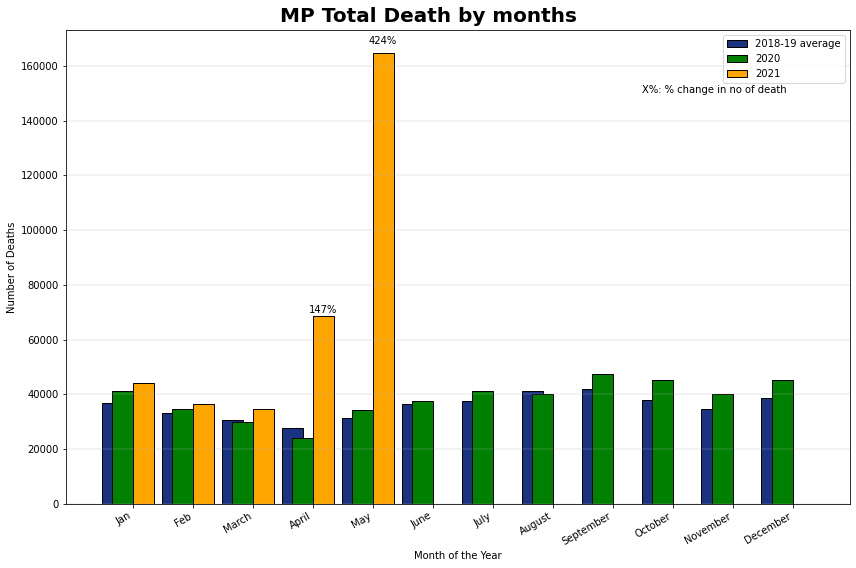

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

fig.suptitle("MP Total Death by months", fontsize=20, fontweight='bold')

groups = list(mp_deaths['Total registered deaths in:'].unique())

n = len(groups)
r = np.arange(n)
width = 0.35

rects1 = plt.bar(
    r, 
    mp_deaths['2018-19 average'],
    color = (0.1, 0.2, 0.5),
    width = width, 
    edgecolor = 'black',
    label='2018-19 average',
    align='edge'
)

rects2 = plt.bar(
    r + width, 
    mp_deaths[2020],
    color = 'g',
    width = width, 
    edgecolor = 'black',
    label='2020'
)

percent_increase_20 = list(mp_deaths['% Increment 20'])
for i, v in enumerate(list(mp_deaths[2020])):
  if int(percent_increase_20[i]) > 50:
    plt.text(
        (r + width)[i] - 0.25, 
        v * 1.02 if percent_increase_20[i] > 0 else v * 1.2, 
        str(int(percent_increase_20[i])) + '%'
    )

rects3 = plt.bar(
    r + 2*width, 
    mp_deaths[2021],
    color = 'orange',
    width = width, 
    edgecolor = 'black',
    label='2021'
)

percent_increase_21 = list(mp_deaths['% Increment 21'])
for i, v in enumerate(list(mp_deaths[2021])):
  if int(percent_increase_21[i]) > 100:
    plt.text((r + 2*width)[i] - 0.25, v * 1.02, str(int(percent_increase_21[i])) + '%')


ax.annotate(
    'X%: % change in no of death', 
    xy=(r[-3] + width, 150000),
    xytext=(r[-3], 150000),
)

plt.grid(which='both',axis='y', linewidth=0.3)

plt.xlabel("Month of the Year")
plt.ylabel("Number of Deaths")

plt.xticks(r + 1.5*width, groups)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

fig.tight_layout()
fig.subplots_adjust(top=0.94)

plt.legend(loc='upper right')
  
plt.show()

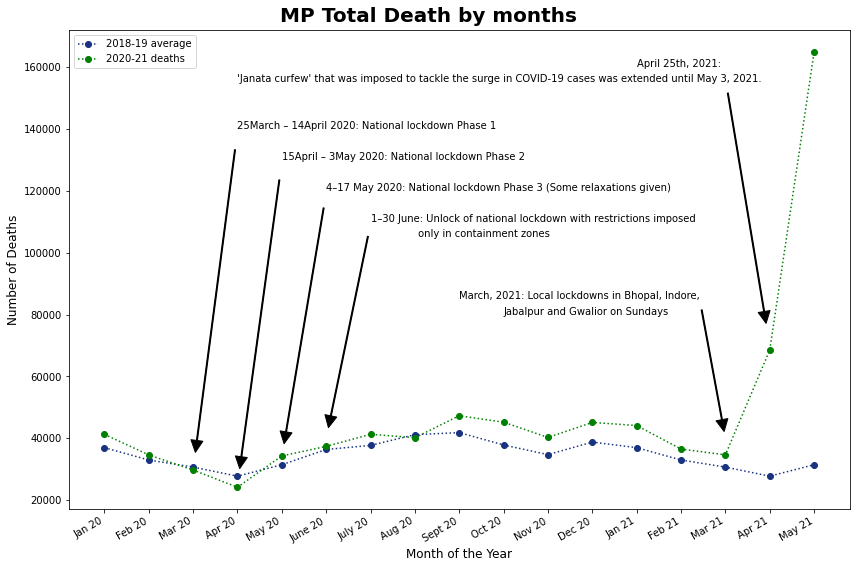

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

fig.suptitle("MP Total Death by months", fontsize=20, fontweight='bold')

groups = list(mp_deaths['Total registered deaths in:'].unique())

d_21 = list(mp_deaths[mp_deaths[2021] > 0][2021])
l = len(d_21)

plt.plot(
    list(mp_deaths['Month_Year_20']) + list(mp_deaths['Month_Year_21'])[:l], 
    list(mp_deaths['2018-19 average']) + list(mp_deaths['2018-19 average'])[:l],
    ':o',
    color = (0.1, 0.2, 0.5),
    label='2018-19 average',
)

plt.plot(
    list(mp_deaths['Month_Year_20']) + list(mp_deaths['Month_Year_21'])[:l], 
    list(mp_deaths[2020]) + d_21,
    ':o',
    color = 'g',
    label='2020-21 deaths'
)

# plt.grid(which='both',axis='y', linewidth=0.5)

plt.xlabel("Month of the Year",fontdict={
    'fontsize':12
})
plt.ylabel("Number of Deaths",fontdict={
    'fontsize':12
})

ax.annotate(
    '25March – 14April 2020: National lockdown Phase 1', 
    xy=('Mar 20', 30000), 
    xytext=('Apr 20', 140000),
    arrowprops=dict(
        facecolor='black', 
        shrink=0.05,
        width=1
        )
)
ax.annotate(
    '15April – 3May 2020: National lockdown Phase 2', 
    xy=('Apr 20', 25000), 
    xytext=('May 20', 130000),
    arrowprops=dict(
        facecolor='black', 
        shrink=0.05,
        width=1
        )
)

ax.annotate(
    '4–17 May 2020: National lockdown Phase 3 (Some relaxations given)', 
    xy=('May 20', 34000), 
    xytext=('June 20', 120000),
    arrowprops=dict(
        facecolor='black', 
        shrink=0.05,
        width=1
        )
)

ax.annotate(
    '1–30 June: Unlock of national lockdown with restrictions imposed', 
    xy=('June 20', 40000), 
    xytext=('July 20', 110000),
    arrowprops=dict(
        facecolor='black', 
        shrink=0.05,
        width=1
        )
)

ax.annotate(
    ' only in containment zones', 
    xy=('June 20', 40000), 
    xytext=('Aug 20', 105000)
)

ax.annotate(
    'March, 2021: Local lockdowns in Bhopal, Indore,', 
    xy=('Mar 21', 40000), 
    xytext=('Sept 20', 85000),
    arrowprops=dict(
        facecolor='black', 
        shrink=0.05,
        width=1
        )
)
ax.annotate(
    'Jabalpur and Gwalior on Sundays', 
    xy=('June 20', 40000), 
    xytext=('Oct 20', 80000)
)

ax.annotate(
    'April 25th, 2021: ', 
    xy=('Apr 21', 70000), 
    xytext=('Jan 21', 160000),
    arrowprops=dict(
        facecolor='black', 
        shrink=0.08,
        width=1
        )
)
ax.annotate(
    '\'Janata curfew\' that was imposed to tackle the surge in COVID-19 cases was extended until May 3, 2021.', 
    xy=('Apr 21', 70000), 
    xytext=('Apr 20', 155000)
)

plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

fig.tight_layout()
fig.subplots_adjust(top=0.94)

plt.legend(loc='upper left')
  
plt.show()

---

In [ ]:
kt_deaths = pd.read_excel(
    '/content/drive/MyDrive/Dataset/Data_Visualization_Assignment_4/Data Viz_Assignment 4_Datasets/Karnataka, BBMP deaths data.xlsx',
    sheet_name=0,
    header = 2
)
arr = list(range(12,35))
kt_deaths.drop(arr, axis=0, inplace=True)
kt_deaths['2018-19 average'] = (kt_deaths[2018] + kt_deaths[2019]) /2
kt_deaths.rename({'2020*': 2020, '2021*': 2021}, axis=1, inplace=True)
kt_deaths.fillna(0, inplace=True)
# kt_deaths.head()

In [ ]:
kt_deaths['% Increment 21'] = np.round(((kt_deaths[2021] - kt_deaths['2018-19 average']) / kt_deaths['2018-19 average']) * 100)
kt_deaths['% Increment 20'] = np.round(((kt_deaths[2020] - kt_deaths['2018-19 average']) / kt_deaths['2018-19 average']) * 100)
# kt_deaths.head()

In [ ]:
kt_deaths['Officially reported covid deaths in 2021'] = np.array([36,114,236,2956,13567,0,0,0,0,0,0,0])
kt_deaths['Excess deaths (2021 minus 2018-19 average)'] = kt_deaths[2021] - kt_deaths['2018-19 average']
# kt_deaths.head()

In [ ]:
kt_deaths['Month_Year_20'] = kt_deaths['Month'].replace({
    'January': 'Jan 20', 
    'February': 'Feb 20',
    'March': 'Mar 20',
    'April': 'Apr 20',
    'May': 'May 20',
    'June': 'June 20',
    'July': 'July 20',
    'August': 'Aug 20',
    'September': 'Sept 20',
    'October': 'Oct 20',
    'November': 'Nov 20',
    'December': 'Dec 20',
})
kt_deaths['Month_Year_21'] = kt_deaths['Month'].replace({
    'January': 'Jan 21', 
    'February': 'Feb 21',
    'March': 'Mar 21',
    'April': 'Apr 21',
    'May': 'May 21',
    'June': 'June 21',
    'July': 'July 21',
    'August': 'Aug 21',
    'September': 'Sept 21',
    'October': 'Oct 21',
    'November': 'Nov 21',
    'December': 'Dec 21',
})
kt_deaths.head()

,Month,2015,2016,2017,2018,2019,2020,2021,2018-19 average,% Increment 21,% Increment 20,Officially reported covid deaths in 2021,Excess deaths (2021 minus 2018-19 average),Month_Year_20,Month_Year_21
0,January,36982.0,34598.0,41135.0,51127.0,42645.0,47440.0,50319.0,46886.0,7.0,1.0,36,3433.0,Jan 20,Jan 21
1,February,31974.0,32206.0,35940.0,39904.0,38643.0,42034.0,45884.0,39273.5,17.0,7.0,114,6610.5,Feb 20,Feb 21
2,March,32928.0,34855.0,39998.0,42201.0,41644.0,32794.0,45987.0,41922.5,10.0,-22.0,236,4064.5,Mar 20,Mar 21
3,April,29152.0,32274.0,35486.0,36047.0,32954.0,19629.0,46000.0,34500.5,33.0,-43.0,2956,11499.5,Apr 20,Apr 21
4,May,30338.0,34292.0,38918.0,35038.0,41862.0,39502.0,77000.0,38450.0,100.0,3.0,13567,38550.0,May 20,May 21


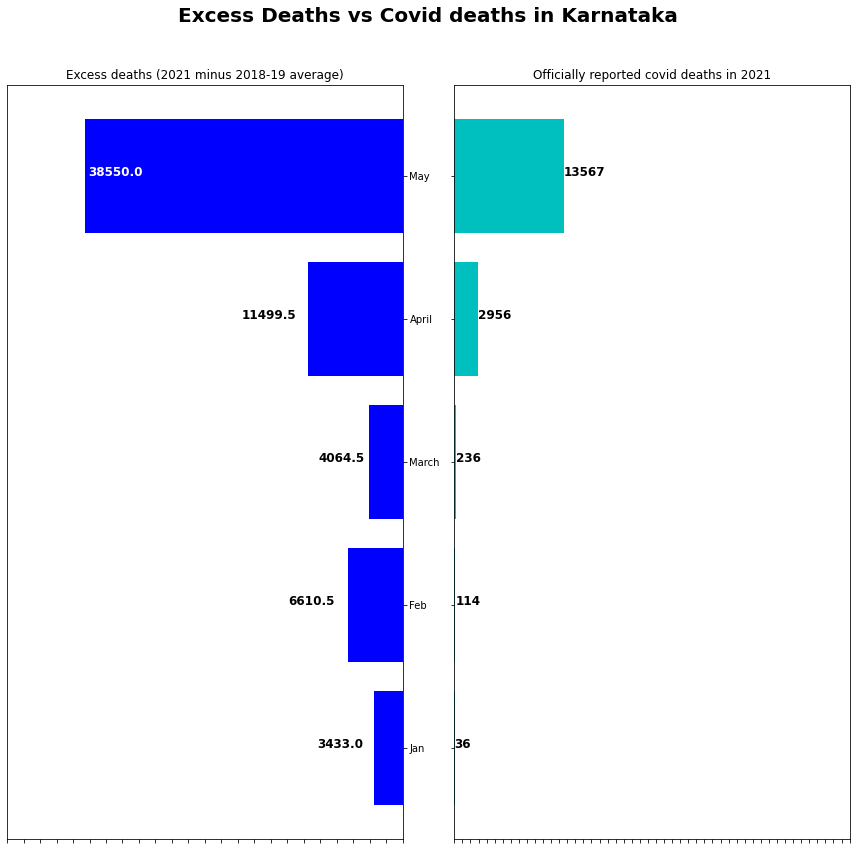

In [ ]:
x = list(kt_deaths[kt_deaths['Excess deaths (2021 minus 2018-19 average)'] > 0]['Excess deaths (2021 minus 2018-19 average)'])
y = list(kt_deaths[kt_deaths['Officially reported covid deaths in 2021'] > 0]['Officially reported covid deaths in 2021'])

l = min(len(x), len(y))
r = np.arange(l)
groups = list(mp_deaths['Total registered deaths in:'].unique())[:l]

x_range_1 = list(range(0, 50000, 2000))
x_range_2 = list(range(0, 50000, 1000))

fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(12, 12))
fig.suptitle("Excess Deaths vs Covid deaths in Karnataka", fontsize=20, fontweight='bold')

p1 = axes[0].barh(
    r, 
    x[:l],
    align='center', 
    color='b',
    label='Excess deaths (2021 minus 2018-19 average)'
)

p2 = axes[1].barh(
    r, 
    y[:l], 
    align='center', 
    color='c',
    label='Officially reported covid deaths in 2021'
)

axes[0].invert_xaxis()
axes[0].set(yticks=r, yticklabels=groups)
axes[0].set(xticks=x_range_1, xticklabels=[])
axes[1].set(xticks=x_range_2, xticklabels=[])
axes[0].yaxis.tick_right()

for i, v in enumerate(x[:l]):
  if i == 0:
    axes[0].text(v*3, i, str(v), color='black', fontweight='bold', fontsize=12)
  elif i == 1:
    axes[0].text(v*2.1, i, str(v), color='black', fontweight='bold', fontsize=12)
  elif i == 2:
    axes[0].text(v*2.5, i, str(v), color='black', fontweight='bold', fontsize=12)
  elif i == 3:
    axes[0].text(v*1.7, i, str(v), color='black', fontweight='bold', fontsize=12)
  elif i == 4:
    axes[0].text(v*0.99, i, str(v), color='white', fontweight='bold', fontsize=12)
  

for i, v in enumerate(y[:l]):
  axes[1].text(v, i, str(v), fontweight='bold', fontsize=12)

axes[0].set_title('Excess deaths (2021 minus 2018-19 average)', fontsize=12)
axes[1].set_title('Officially reported covid deaths in 2021', fontsize=12)

fig.tight_layout()
fig.subplots_adjust(top=0.89)
plt.show()

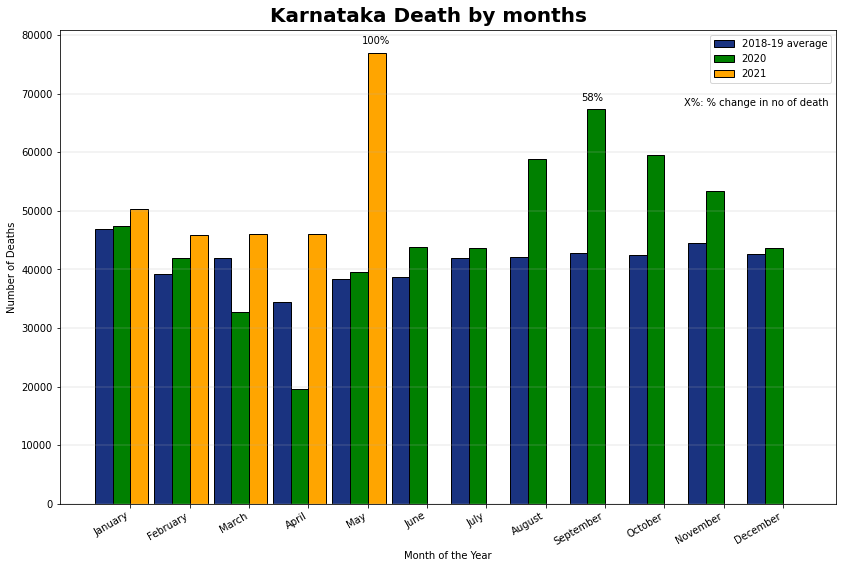

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

fig.suptitle("Karnataka Death by months", fontsize=20, fontweight='bold')

groups = list(kt_deaths['Month'].unique())

n = len(groups)
r = np.arange(n)
width = 0.3
  
rects1 = plt.bar(
    r, 
    kt_deaths['2018-19 average'],
    color = (0.1, 0.2, 0.5),
    width = width, 
    edgecolor = 'black',
    label='2018-19 average',
    # align='edge'
)

rects2 = plt.bar(
    r + width, 
    kt_deaths[2020],
    color = 'g',
    width = width, 
    edgecolor = 'black',
    label='2020'
)

d_2018_19 = list(kt_deaths['2018-19 average'])
percent_increase_20 = list(kt_deaths['% Increment 20'])
for i, v in enumerate(list(kt_deaths[2020])):
  if percent_increase_20[i] >40:
    plt.text(
        (r + width)[i] - 0.25, 
        max(v,d_2018_19[i]) * 1.02, 
        str(int(percent_increase_20[i])) + '%'
    )


rects3 = plt.bar(
    r + 2*width, 
    kt_deaths[2021],
    color = 'orange',
    width = width, 
    edgecolor = 'black',
    label='2021'
)

percent_increase_21 = list(kt_deaths['% Increment 21'])
for i, v in enumerate(list(kt_deaths[2021])):
  if percent_increase_21[i] > 90:
    plt.text((r + 2*width)[i] - 0.25, v * 1.02, str(int(percent_increase_21[i])) + '%')

ax.annotate(
    'X%: % change in no of death', 
    xy=(r[-3] + width, 65000),
    xytext=(r[-3]+2.6*width, 68000),
)

plt.grid(which='both',axis='y', linewidth=0.3)

plt.xlabel("Month of the Year")
plt.ylabel("Number of Deaths")

plt.xticks(r + 1.5*width, groups)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

fig.tight_layout()
fig.subplots_adjust(top=0.94)

plt.legend(loc='upper right')
  
plt.show()

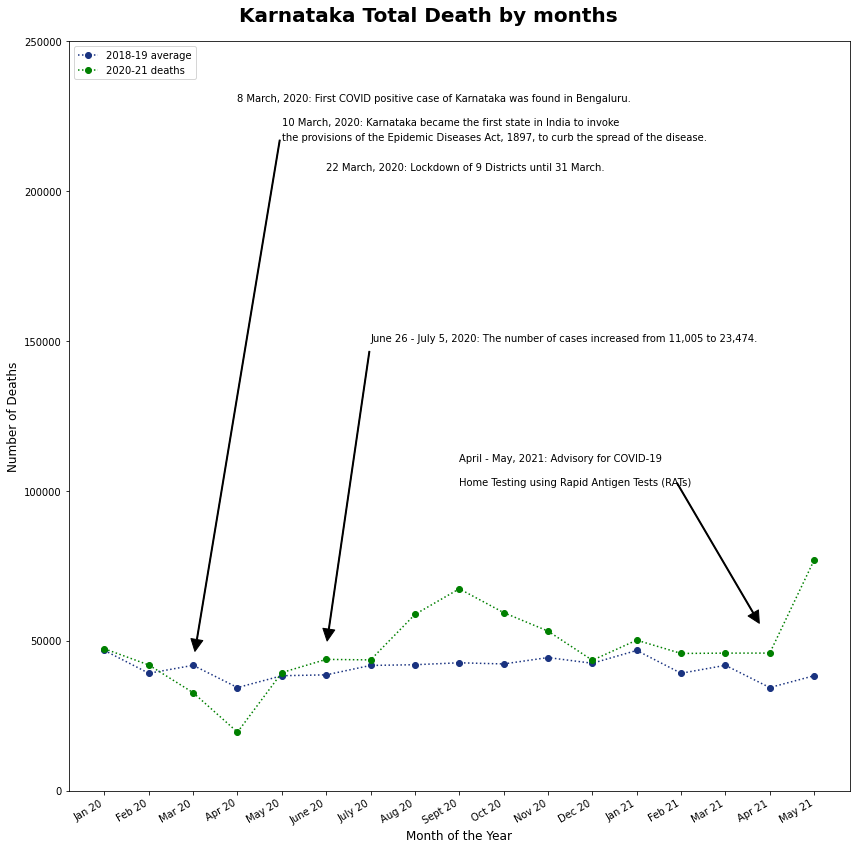

In [ ]:
fig, ax = plt.subplots(figsize=(12, 12))

fig.suptitle("Karnataka Total Death by months", fontsize=20, fontweight='bold')

groups = list(kt_deaths['Month'].unique())

d_21 = list(kt_deaths[kt_deaths[2021] > 0][2021])
l = len(d_21)

plt.plot(
    list(kt_deaths['Month_Year_20']) + list(kt_deaths['Month_Year_21'])[:l], 
    list(kt_deaths['2018-19 average']) + list(kt_deaths['2018-19 average'])[:l],
    ':o',
    color = (0.1, 0.2, 0.5),
    label='2018-19 average',
)

plt.plot(
    list(kt_deaths['Month_Year_20']) + list(kt_deaths['Month_Year_21'])[:l], 
    list(kt_deaths[2020]) + d_21,
    ':o',
    color = 'g',
    label='2020-21 deaths'
)

################################################################################
ax.annotate(
    '8 March, 2020: First COVID positive case of Karnataka was found in Bengaluru. ', 
    xy=('Mar 20', 45000), 
    xytext=('Apr 20', 230000),
    # arrowprops=dict(
    #     facecolor='black', 
    #     shrink=0.02,
    #     width=1
    #     )
)
ax.annotate(
    '10 March, 2020: Karnataka became the first state in India to invoke ', 
    xy=('Mar 20', 43000),
    xytext=('May 20', 222000),
    arrowprops=dict(
        facecolor='black', 
        shrink=0.02,
        width=1
        )
)
ax.annotate(
    'the provisions of the Epidemic Diseases Act, 1897, to curb the spread of the disease.', 
    xy=('Mar 20', 45000),
    xytext=('May 20', 217000),
)

ax.annotate(
    '22 March, 2020: Lockdown of 9 Districts until 31 March.', 
    xy=('Mar 20', 42000), 
    xytext=('June 20', 207000),
    # arrowprops=dict(
    #     facecolor='black', 
    #     shrink=0.02,
    #     width=1
    #     )
)
# ax.annotate(
#     '25 March – 14 April 2020: National lockdown Phase 1', 
#     xy=('Mar 20', 45000),
#     xytext=('June 20', 172000),
# )

# ax.annotate(
#     '15 April – 3 May 2020: National lockdown Phase 2', 
#     xy=('Apr 20', 25000), 
#     xytext=('June 20', 150000),
#     arrowprops=dict(
#         facecolor='black', 
#         shrink=0.02,
#         width=1
#         )
# )

# ax.annotate(
#     '4 May – 17 May 2020: National lockdown Phase 3 (Some relaxations given)', 
#     xy=('May 20', 45000), 
#     xytext=('July 20', 135000),
#     arrowprops=dict(
#         facecolor='black', 
#         shrink=0.02,
#         width=1
#         )
# )

ax.annotate(
    'June 26 - July 5, 2020: The number of cases increased from 11,005 to 23,474.', 
    xy=('June 20', 48000), 
    xytext=('July 20', 150000),
    arrowprops=dict(
        facecolor='black', 
        shrink=0.02,
        width=1
        )
)

ax.annotate(
    'April - May, 2021: Advisory for COVID-19 ', 
    xy=('Apr 21', 50000), 
    xytext=('Sept 20', 110000),
    arrowprops=dict(
        facecolor='black', 
        shrink=0.1,
        width=1
        )
)
ax.annotate(
    'Home Testing using Rapid Antigen Tests (RATs)', 
    xy=('Apr 21', 80000), 
    xytext=('Sept 20', 102000),
)

plt.ylim(0, 250000)
plt.xlabel("Month of the Year",fontdict={
    'fontsize':12
})
plt.ylabel("Number of Deaths",fontdict={
    'fontsize':12
})

plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

fig.tight_layout()
fig.subplots_adjust(top=0.94)

plt.legend(loc='upper left')
  
plt.show()

---

In [ ]:
tn_deaths = pd.read_excel(
    '/content/drive/MyDrive/Dataset/Data_Visualization_Assignment_4/Data Viz_Assignment 4_Datasets/CRS data for Tamil Nadu.xlsx',
    sheet_name=0,
    header = 2
)
tn_deaths.drop(12, axis=0, inplace=True)
tn_deaths['2018-19 average'] = (tn_deaths[2018] + tn_deaths[2019]) /2
tn_deaths.rename({'Monthwise': 'Month'}, axis=1, inplace=True)
tn_deaths.fillna(0, inplace=True)
# tn_deaths.head()

In [ ]:
tn_deaths['% Increment 21'] = np.round(((tn_deaths[2021] - tn_deaths['2018-19 average']) / tn_deaths['2018-19 average']) * 100)
tn_deaths['% Increment 20'] = np.round(((tn_deaths[2020] - tn_deaths['2018-19 average']) / tn_deaths['2018-19 average']) * 100)

In [ ]:
tn_deaths['Officially reported covid deaths in 2021'] = np.array([247,140,254,1323,10186,0,0,0,0,0,0,0])
tn_deaths['Excess deaths (2021 minus 2018-19 average)'] = tn_deaths[2021] - tn_deaths['2018-19 average']
# tn_deaths.head()

In [ ]:
tn_deaths['Month_Year_20'] = tn_deaths['Month'].replace({
    'January': 'Jan 20', 
    'February': 'Feb 20',
    'March': 'Mar 20',
    'April': 'Apr 20',
    'May': 'May 20',
    'June': 'June 20',
    'July': 'July 20',
    'August': 'Aug 20',
    'September': 'Sept 20',
    'October': 'Oct 20',
    'November': 'Nov 20',
    'December': 'Dec 20',
})
tn_deaths['Month_Year_21'] = tn_deaths['Month'].replace({
    'January': 'Jan 21', 
    'February': 'Feb 21',
    'March': 'Mar 21',
    'April': 'Apr 21',
    'May': 'May 21',
    'June': 'June 21',
    'July': 'July 21',
    'August': 'Aug 21',
    'September': 'Sept 21',
    'October': 'Oct 21',
    'November': 'Nov 21',
    'December': 'Dec 21',
})
tn_deaths.head()

,Month,2018,2019,2020,2021,2018-19 average,% Increment 21,% Increment 20,Officially reported covid deaths in 2021,Excess deaths (2021 minus 2018-19 average),Month_Year_20,Month_Year_21
0,January,55390,58405,58132,62273.0,56897.5,9.0,2.0,247,5375.5,Jan 20,Jan 21
1,February,47231,46560,48893,52845.0,46895.5,13.0,4.0,140,5949.5,Feb 20,Feb 21
2,March,46703,47772,45987,50959.0,47237.5,8.0,-3.0,254,3721.5,Mar 20,Mar 21
3,April,43586,45913,41482,58775.0,44749.5,31.0,-7.0,1323,14025.5,Apr 20,Apr 21
4,May,43928,51639,50834,93573.0,47783.5,96.0,6.0,10186,45789.5,May 20,May 21


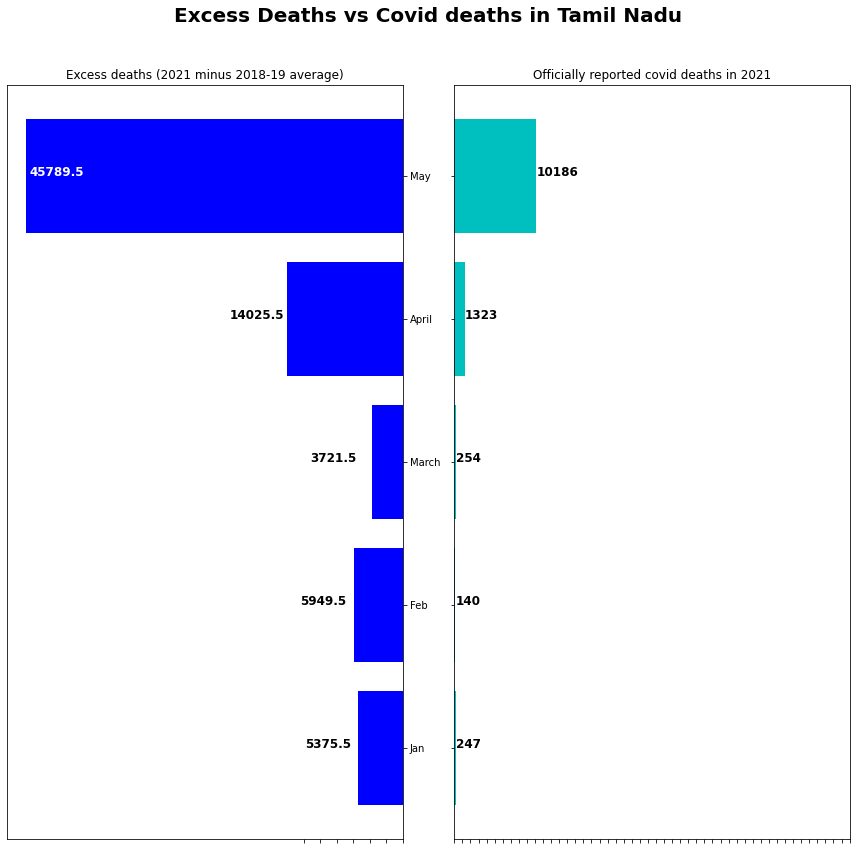

In [ ]:
x = list(tn_deaths[tn_deaths['Excess deaths (2021 minus 2018-19 average)'] > 0]['Excess deaths (2021 minus 2018-19 average)'])
y = list(tn_deaths[tn_deaths['Officially reported covid deaths in 2021'] > 0]['Officially reported covid deaths in 2021'])

l = min(len(x), len(y))
r = np.arange(l)
groups = list(mp_deaths['Total registered deaths in:'].unique())[:l]

x_range_1 = list(range(0, 14000, 2000))
x_range_2 = list(range(0, 50000, 1000))

fig, axes = plt.subplots(ncols=2, sharey=True, figsize=(12, 12))
fig.suptitle("Excess Deaths vs Covid deaths in Tamil Nadu", fontsize=20, fontweight='bold')

p1 = axes[0].barh(
    r, 
    x[:l],
    align='center', 
    color='b',
    label='Excess deaths (2021 minus 2018-19 average)'
)

p2 = axes[1].barh(
    r, 
    y[:l], 
    align='center', 
    color='c',
    label='Officially reported covid deaths in 2021'
)

axes[0].invert_xaxis()
axes[0].set(yticks=r, yticklabels=groups)
axes[0].set(xticks=x_range_1, xticklabels=[])
axes[1].set(xticks=x_range_2, xticklabels=[])
axes[0].yaxis.tick_right()

for i, v in enumerate(x[:l]):
  if i == 0:
    axes[0].text(v*2.2, i, str(v), color='black', fontweight='bold', fontsize=12)
  elif i == 1:
    axes[0].text(v*2.1, i, str(v), color='black', fontweight='bold', fontsize=12)
  elif i == 2:
    axes[0].text(v*3, i, str(v), color='black', fontweight='bold', fontsize=12)
  elif i == 3:
    axes[0].text(v*1.5, i, str(v), color='black', fontweight='bold', fontsize=12)
  elif i == 4:
    axes[0].text(v*0.99, i, str(v), color='white', fontweight='bold', fontsize=12)
  

for i, v in enumerate(y[:l]):
  axes[1].text(v, i, str(v), fontweight='bold', fontsize=12)

axes[0].set_title('Excess deaths (2021 minus 2018-19 average)', fontsize=12)
axes[1].set_title('Officially reported covid deaths in 2021', fontsize=12)

fig.tight_layout()
fig.subplots_adjust(top=0.89)
plt.show()

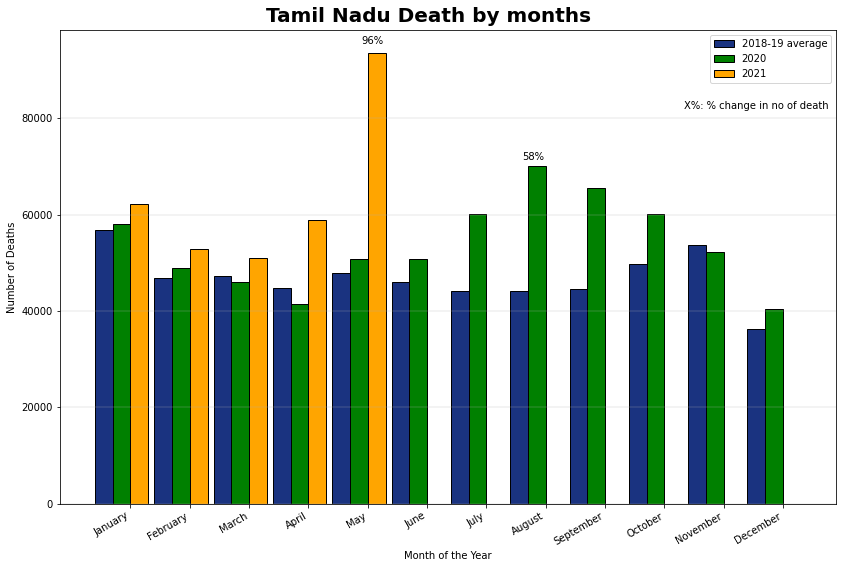

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

fig.suptitle("Tamil Nadu Death by months", fontsize=20, fontweight='bold')

groups = list(tn_deaths['Month'].unique())

n = len(groups)
r = np.arange(n)
width = 0.3
  
rects1 = plt.bar(
    r, 
    tn_deaths['2018-19 average'],
    color = (0.1, 0.2, 0.5),
    width = width, 
    edgecolor = 'black',
    label='2018-19 average',
    # align='edge'
)

rects2 = plt.bar(
    r + width, 
    tn_deaths[2020],
    color = 'g',
    width = width, 
    edgecolor = 'black',
    label='2020'
)

d_2018_19 = list(tn_deaths['2018-19 average'])
percent_increase_20 = list(tn_deaths['% Increment 20'])
for i, v in enumerate(list(tn_deaths[2020])):
  if percent_increase_20[i] > 50:
    plt.text(
        (r + width)[i] - 0.25, 
        max(v,d_2018_19[i]) * 1.02, 
        str(int(percent_increase_20[i])) + '%'
    )

rects3 = plt.bar(
    r + 2*width, 
    tn_deaths[2021],
    color = 'orange',
    width = width, 
    edgecolor = 'black',
    label='2021'
)

percent_increase_21 = list(tn_deaths['% Increment 21'])
for i, v in enumerate(list(tn_deaths[2021])):
  if percent_increase_21[i] > 90:
    plt.text((r + 2*width)[i] - 0.25, v * 1.02, str(int(percent_increase_21[i])) + '%')

ax.annotate(
    'X%: % change in no of death', 
    xy=(r[-3] + width, 65000),
    xytext=(r[-3]+2.6*width, 82000),
)

plt.grid(which='both',axis='y', linewidth=0.3)

plt.xlabel("Month of the Year")
plt.ylabel("Number of Deaths")

plt.xticks(r + 1.5*width, groups)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

fig.tight_layout()
fig.subplots_adjust(top=0.94)

plt.legend(loc='upper right')
  
plt.show()

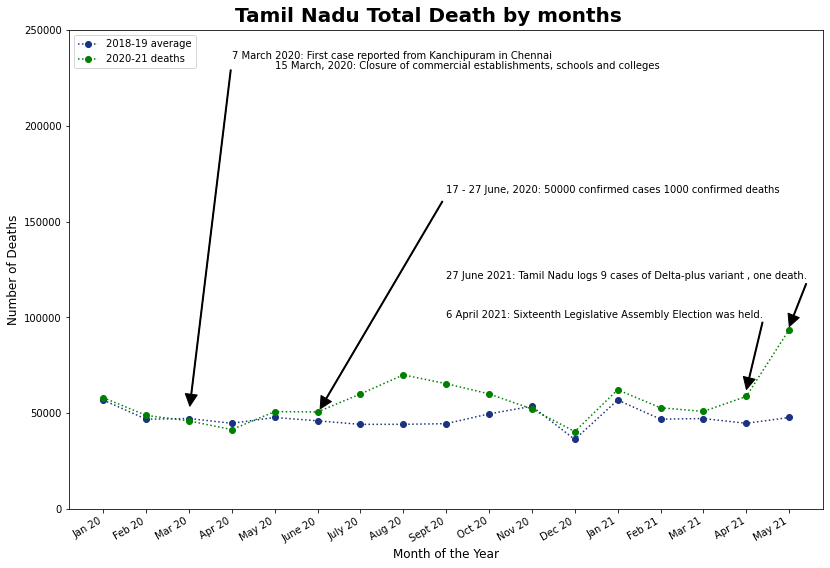

In [ ]:
fig, ax = plt.subplots(figsize=(12, 8))

fig.suptitle("Tamil Nadu Total Death by months", fontsize=20, fontweight='bold')

groups = list(tn_deaths['Month'].unique())

d_21 = list(tn_deaths[tn_deaths[2021] > 0][2021])
l = len(d_21)

plt.plot(
    list(tn_deaths['Month_Year_20']) + list(tn_deaths['Month_Year_21'])[:l], 
    list(tn_deaths['2018-19 average']) + list(tn_deaths['2018-19 average'])[:l],
    ':o',
    color = (0.1, 0.2, 0.5),
    label='2018-19 average',
)

plt.plot(
    list(tn_deaths['Month_Year_20']) + list(tn_deaths['Month_Year_21'])[:l], 
    list(tn_deaths[2020]) + d_21,
    ':o',
    color = 'g',
    label='2020-21 deaths'
)

################################################################################
ax.annotate(
    '7 March 2020: First case reported from Kanchipuram in Chennai', 
    xy=('Mar 20', 50000), 
    xytext=('Apr 20', 235000),
    arrowprops=dict(
        facecolor='black', 
        shrink=0.02,
        width=1
        )
)

ax.annotate(
    '15 March, 2020: Closure of commercial establishments, schools and colleges', 
    xy=('Mar 20', 50000), 
    xytext=('May 20', 230000),
    # arrowprops=dict(
    #     facecolor='black', 
    #     shrink=0.02,
    #     width=1
    #     )
)

# ax.annotate(
#     '25 March – 14 April 2020: National lockdown Phase 1', 
#     xy=('Mar 20', 50000), 
#     xytext=('June 20', 205000),
#     arrowprops=dict(
#         facecolor='black', 
#         shrink=0.02,
#         width=1
#         )
# )

# ax.annotate(
#     '15 April – 3 May 2020: National lockdown Phase 2', 
#     xy=('Apr 20', 45000), 
#     xytext=('July 20', 185000),
#     arrowprops=dict(
#         facecolor='black', 
#         shrink=0.02,
#         width=1
#         )
# )

ax.annotate(
    '17 - 27 June, 2020: 50000 confirmed cases 1000 confirmed deaths', 
    xy=('June 20', 50000), 
    xytext=('Sept 20', 165000),
    arrowprops=dict(
        facecolor='black', 
        shrink=0.02,
        width=1
        )
)

ax.annotate(
    '6 April 2021: Sixteenth Legislative Assembly Election was held.', 
    xy=('Apr 21', 62000), 
    xytext=('Sept 20', 100000),
    arrowprops=dict(
        facecolor='black', 
        shrink=0.01,
        width=1
        )
)

ax.annotate(
    '27 June 2021: Tamil Nadu logs 9 cases of Delta-plus variant , one death.', 
    xy=('May 21', 95000), 
    xytext=('Sept 20', 120000),
    arrowprops=dict(
        facecolor='black', 
        shrink=0.01,
        width=1
        )
)

plt.ylim(0,250000)

plt.xlabel("Month of the Year",fontdict={
    'fontsize':12
})

plt.ylabel("Number of Deaths",fontdict={
    'fontsize':12
})

plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')

fig.tight_layout()
fig.subplots_adjust(top=0.94)

plt.legend(loc='upper left')
  
plt.show()

---

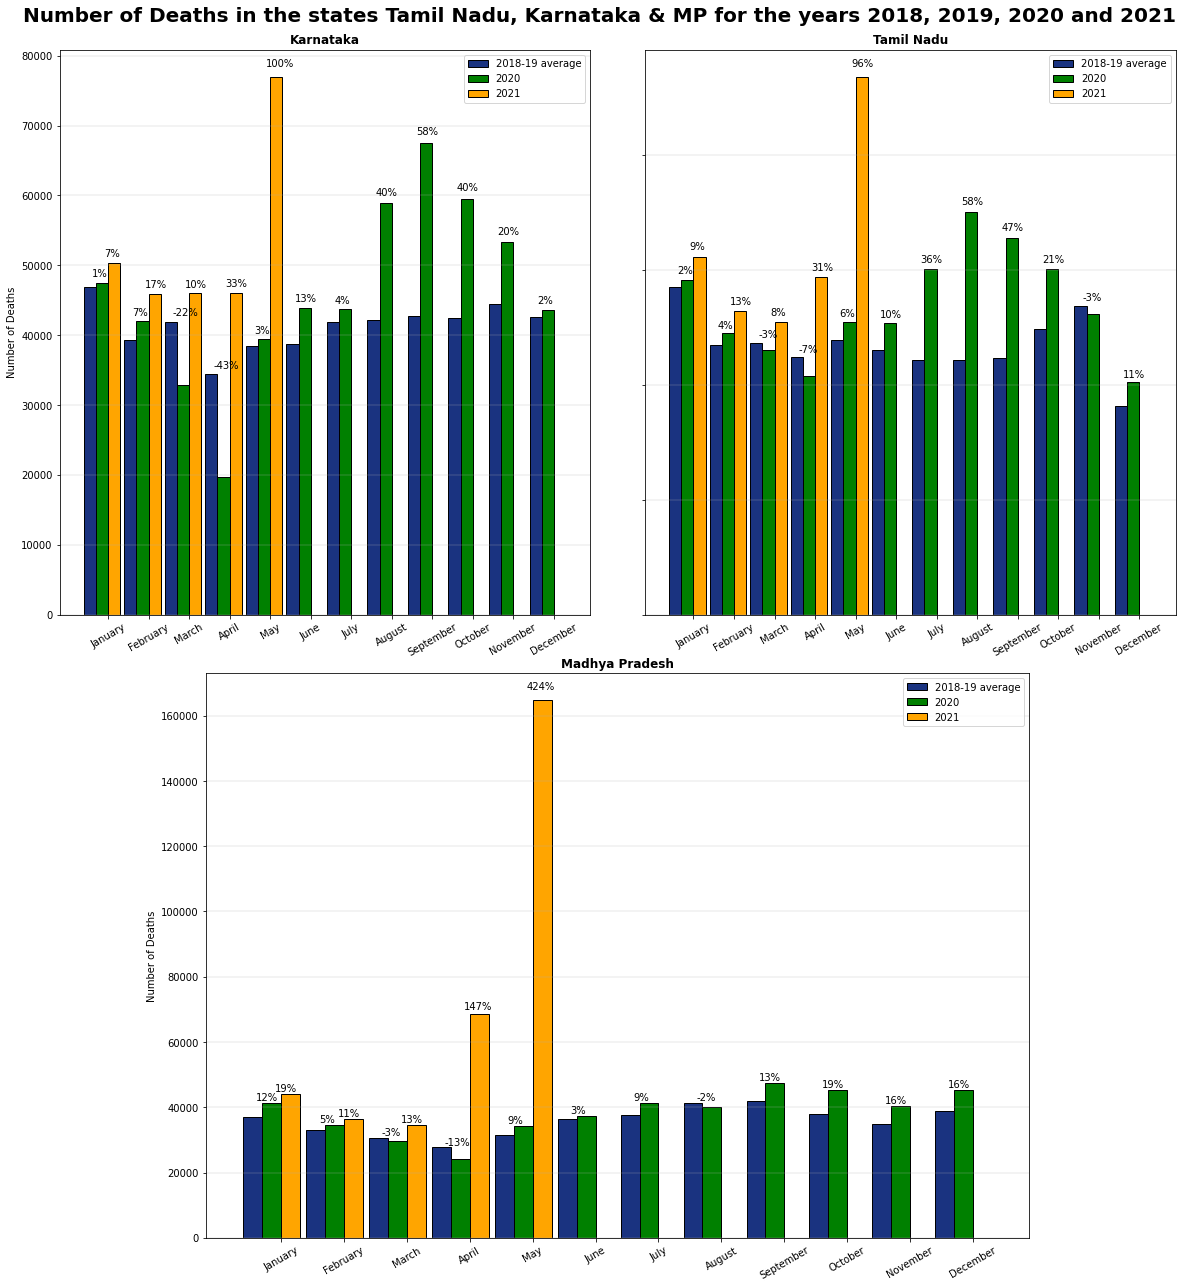

In [ ]:
groups = list(tn_deaths['Month'].unique())

n = len(groups)
r = np.arange(n)
width = 0.3

# Set up axes with gridspec
fig = plt.figure(figsize=(20,20))
fig.suptitle("Number of Deaths in the states Tamil Nadu, Karnataka & MP for the years 2018, 2019, 2020 and 2021", fontsize=20, fontweight='bold')

grid = plt.GridSpec(8, 8, hspace=0.6, wspace=0.6)

main_ax = fig.add_subplot(grid[:-4,4:])

y_hist = fig.add_subplot(
    grid[:-4,:4], 
    # sharey=main_ax
)
x_hist = fig.add_subplot(
    grid[-4:,1:7],
    # sharex=main_ax
) 

##################### Tamil Nadu ###########################
  
main_ax.bar(
    r, 
    tn_deaths['2018-19 average'],
    color = (0.1, 0.2, 0.5),
    width = width, 
    edgecolor = 'black',
    label='2018-19 average'
)

main_ax.bar(
    r + width, 
    tn_deaths[2020],
    color = 'g',
    width = width, 
    edgecolor = 'black',
    label='2020'
)

tn_d_2018_19 = tn_deaths['2018-19 average']
percent_increase_20 = list(tn_deaths['% Increment 20'])
for i, v in enumerate(list(tn_deaths[2020])):
  if percent_increase_20[i] != 0:
    main_ax.text(
        (r + 1*width)[i] - 0.25, 
        max(v, tn_d_2018_19[i]) * 1.02, 
        str(int(percent_increase_20[i])) + '%'
    )

main_ax.bar(
    r + 2*width, 
    tn_deaths[2021],
    color = 'orange',
    width = width, 
    edgecolor = 'black',
    label='2021'
)

percent_increase_21 = list(tn_deaths['% Increment 21'])
for i, v in enumerate(list(tn_deaths[2021])):
  if percent_increase_21[i] > 0:
    main_ax.text(
        (r + 2*width)[i] - 0.25, 
        max(v, tn_d_2018_19[i]) * 1.02, 
        str(int(percent_increase_21[i])) + '%'
    )

main_ax.set_title('Tamil Nadu', fontdict={'fontsize': 12, 'fontweight' : 'bold',})

main_ax.grid(which='both', axis='y', linewidth=0.3)

main_ax.set_xticks(r + 1.5*width)
main_ax.set_xticklabels(groups)
main_ax.set_yticklabels([])

labels = main_ax.get_xticklabels()

for i in labels:
  i.set_rotation(30)

main_ax.legend(loc='upper right')

############################################################################

##################### Karnataka ###########################
y_hist.bar(
    r, 
    kt_deaths['2018-19 average'],
    color = (0.1, 0.2, 0.5),
    width = width, 
    edgecolor = 'black',
    label='2018-19 average'
)

y_hist.bar(
    r + width, 
    kt_deaths[2020],
    color = 'g',
    width = width, 
    edgecolor = 'black',
    label='2020'
)

kt_d_2018_19 = kt_deaths['2018-19 average']
percent_increase_20 = list(kt_deaths['% Increment 20'])
for i, v in enumerate(list(kt_deaths[2020])):
  if percent_increase_20[i] != 0:
    y_hist.text(
        (r + 1*width)[i] - 0.25, 
        max(v, kt_d_2018_19[i]) * 1.02, 
        str(int(percent_increase_20[i])) + '%'
    )

y_hist.bar(
    r + 2*width, 
    kt_deaths[2021],
    color = 'orange',
    width = width, 
    edgecolor = 'black',
    label='2021'
)

percent_increase_21 = list(kt_deaths['% Increment 21'])
for i, v in enumerate(list(kt_deaths[2021])):
  if percent_increase_21[i] > 0:
    y_hist.text((r + 2*width)[i] - 0.25, v * 1.02, str(int(percent_increase_21[i])) + '%')

y_hist.set_title('Karnataka', fontdict={'fontsize': 12, 'fontweight' : 'bold',})

y_hist.grid(which='both',axis='y', linewidth=0.3)

y_hist.set_ylabel("Number of Deaths")

y_hist.set_xticks(r + 1.5*width)
y_hist.set_xticklabels(groups)

labels = y_hist.get_xticklabels()

for i in labels:
  i.set_rotation(30)

y_hist.legend(loc='upper right')
############################################################################

##################### MP ###########################
x_hist.bar(
    r, 
    mp_deaths['2018-19 average'],
    color = (0.1, 0.2, 0.5),
    width = width, 
    edgecolor = 'black',
    label='2018-19 average'
)

x_hist.bar(
    r + width, 
    mp_deaths[2020],
    color = 'g',
    width = width, 
    edgecolor = 'black',
    label='2020'
)

mp_d_2018_19 = mp_deaths['2018-19 average']
percent_increase_20 = list(mp_deaths['% Increment 20'])
for i, v in enumerate(list(mp_deaths[2020])):
  if percent_increase_20[i] != 0:
    x_hist.text(
        (r + width)[i] - 0.25, 
        max(v, mp_d_2018_19[i]) * 1.02, 
        str(int(percent_increase_20[i])) + '%'
    )

x_hist.bar(
    r + 2*width, 
    mp_deaths[2021],
    color = 'orange',
    width = width, 
    edgecolor = 'black',
    label='2021'
)

percent_increase_21 = list(mp_deaths['% Increment 21'])
for i, v in enumerate(list(mp_deaths[2021])):
  if percent_increase_21[i] > 0:
    x_hist.text((r + 2*width)[i] - 0.25, v * 1.02, str(int(percent_increase_21[i])) + '%')

x_hist.set_title('Madhya Pradesh', fontdict={'fontsize': 12, 'fontweight' : 'bold',})

x_hist.grid(which='both',axis='y', linewidth=0.3)

x_hist.set_ylabel("Number of Deaths")

x_hist.set_xticks(r + 1.5*width)
x_hist.set_xticklabels(groups)

labels = x_hist.get_xticklabels()

for i in labels:
  i.set_rotation(30)

x_hist.legend(loc='upper right')
  
############################################################################

fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

---

p-value for 21

In [ ]:
tn_deaths['2018-19 average'].iloc[:5]

0    56897.5
1    46895.5
2    47237.5
3    44749.5
4    47783.5
Name: 2018-19 average, dtype: float64

In [ ]:
l = len(list(tn_deaths[tn_deaths[2021]>0][2021]))
deaths_21 = np.sum(tn_deaths[tn_deaths[2021]>0][2021]) 
deaths_avg_18_19 = np.sum(tn_deaths['2018-19 average'].iloc[:l])
p_value_21 =  (deaths_21 - deaths_avg_18_19) * 100 / deaths_avg_18_19
print(p_value_21)

30.735927181207366


In [ ]:
l = len(list(kt_deaths[kt_deaths[2021]>0][2021]))
deaths_21 = np.sum(kt_deaths[kt_deaths[2021]>0][2021]) 
deaths_avg_18_19 = np.sum(kt_deaths['2018-19 average'].iloc[:l])
p_value_21 =  (deaths_21 - deaths_avg_18_19) * 100 / deaths_avg_18_19
print(p_value_21)

31.913994005944314


In [ ]:
l = len(list(mp_deaths[mp_deaths[2021]>0][2021]))
deaths_21 = np.sum(mp_deaths[mp_deaths[2021]>0][2021]) 
deaths_avg_18_19 = np.sum(mp_deaths['2018-19 average'].iloc[:l])
p_value_21 =  (deaths_21 - deaths_avg_18_19) * 100 / deaths_avg_18_19
print(p_value_21)

118.01403585551509
